# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [ ]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.45MB/s]


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [ ]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10)

In [ ]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.5230, -0.4311, -0.7825,  0.3154, -0.3800,  0.2604, -0.2257, -0.0926,
          1.1225, -1.1102]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [ ]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [ ]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [ ]:
print('Final loss:', loss.data)

Final loss: tensor(0.3574)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

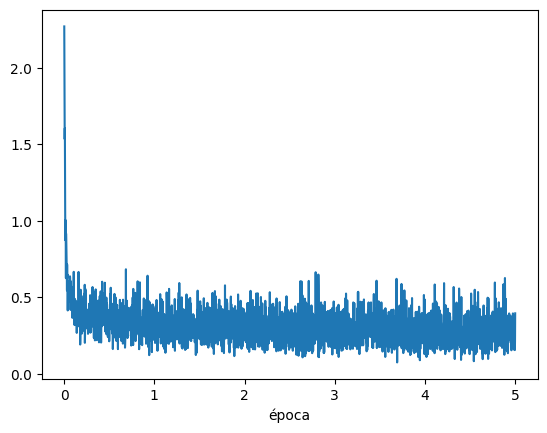

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

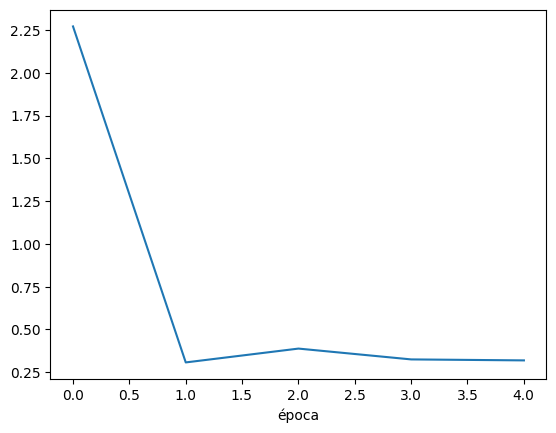

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

**R1** - Tamanho do batch é de 100 amostras.

**R2** - Como os dados são compostos por 60000 imagens e o tamanho do batch é de 100, em cada época existem 60000/100 = **600 mini-batches**.

**R3** - É o processo completo de iteração sobre a base de dados no treinamento do modelo.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

### 1

In [ ]:
# instanciando o modelo e seus params
model = torch.nn.Linear(28*28, 10)

n_epochs = 5
learningRate = 0.5

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
epochs = []
losses = []

total_trained_samples = 0
for epoch_ in range(n_epochs):
    for batch_index, (x_train, y_train) in enumerate(loader_train):
        inputs = Variable(x_train.view(-1, 28 * 28))
        outputs = model(inputs)

        loss = criterion(outputs, Variable(y_train))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {epoch_+1}/{n_epochs} - Batch: {batch_index+1}')
        print(f'Qtd de dados treinados: {total_trained_samples}')


A saída de streaming foi truncada nas últimas 5000 linhas.
Época: 1/5 - Batch: 501
Qtd de dados treinados: 50100
Época: 1/5 - Batch: 502
Qtd de dados treinados: 50200
Época: 1/5 - Batch: 503
Qtd de dados treinados: 50300
Época: 1/5 - Batch: 504
Qtd de dados treinados: 50400
Época: 1/5 - Batch: 505
Qtd de dados treinados: 50500
Época: 1/5 - Batch: 506
Qtd de dados treinados: 50600
Época: 1/5 - Batch: 507
Qtd de dados treinados: 50700
Época: 1/5 - Batch: 508
Qtd de dados treinados: 50800
Época: 1/5 - Batch: 509
Qtd de dados treinados: 50900
Época: 1/5 - Batch: 510
Qtd de dados treinados: 51000
Época: 1/5 - Batch: 511
Qtd de dados treinados: 51100
Época: 1/5 - Batch: 512
Qtd de dados treinados: 51200
Época: 1/5 - Batch: 513
Qtd de dados treinados: 51300
Época: 1/5 - Batch: 514
Qtd de dados treinados: 51400
Época: 1/5 - Batch: 515
Qtd de dados treinados: 51500
Época: 1/5 - Batch: 516
Qtd de dados treinados: 51600
Época: 1/5 - Batch: 517
Qtd de dados treinados: 51700
Época: 1/5 - Batch: 518

In [ ]:
print('Final Loss:', losses[-1])

Final Loss: tensor(0.2655)


### 2

In [ ]:
def create_data_loader(batch_size):
  data_loader = DataLoader(dataset_train, batch_size=batch_size, shuffle=False)
  n_batches_train = len(data_loader)
  return data_loader, n_batches_train

def create_model_configs(lr=0.5):
  model = torch.nn.Linear(28*28, 10)

  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)

  return model, criterion, optimizer


def train_model(batch_size):
  loader_train, n_batches_train = create_data_loader(batch_size)

  model, criterion, optimizer = create_model_configs()

  epochs = []
  losses = []
  n_epochs = 5

  total_trained_samples = 0
  for epoch_ in range(n_epochs):
      for batch_index, (x_train, y_train) in enumerate(loader_train):
          inputs = Variable(x_train.view(-1, 28 * 28))
          outputs = model(inputs)

          loss = criterion(outputs, Variable(y_train))

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          total_trained_samples += x_train.size(0)
          epochs.append(total_trained_samples / total_samples)
          losses.append(loss.data)

  return model, losses, epochs, n_batches_train

In [ ]:
def plot_losses_per_batch(epochs, losses, n_batches_train):
  plt.plot([x+1 for x in epochs[:5 * n_batches_train +1:n_batches_train]], losses[:5 * n_batches_train+1:n_batches_train])
  plt.scatter([x+1 for x in epochs[:5 * n_batches_train + 1:n_batches_train]], losses[:5 * n_batches_train + 1:n_batches_train], color='red', zorder=5)
  plt.xlabel('Época')
  plt.ylabel('Perda')
  plt.title('Perda por época')
  plt.show()

In [ ]:
# modelo com batch = 100
model, losses, epochs, n_batches_train = train_model(batch_size=100)

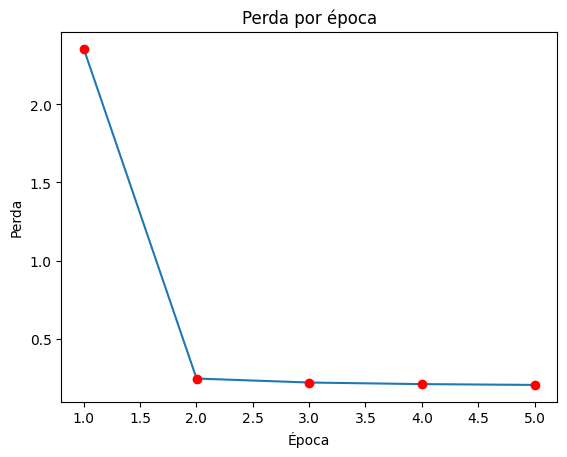

In [ ]:
plot_losses_per_batch(epochs, losses, n_batches_train)

In [ ]:
print(f'Final loss: {losses[-1]}')

Final loss: 0.30441105365753174


In [ ]:
model, losses, epochs, n_batches_train = train_model(batch_size=200)

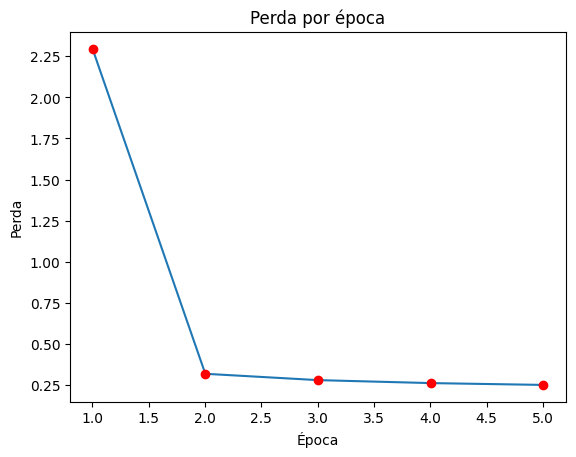

In [ ]:
plot_losses_per_batch(epochs, losses, n_batches_train)

In [ ]:
print(f'Final loss: {losses[-1]}')

Final loss: 0.1682974398136139


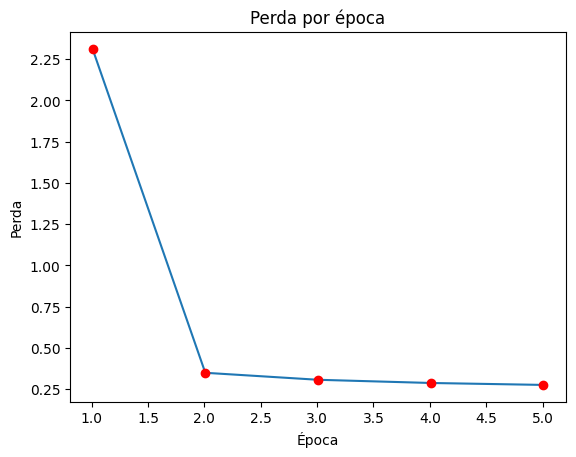

In [ ]:
model, losses, epochs, n_batches_train = train_model(batch_size=500)
plot_losses_per_batch(epochs, losses, n_batches_train)

In [ ]:
print(f'Final loss: {losses[-1]}')

Final loss: 0.2663183808326721


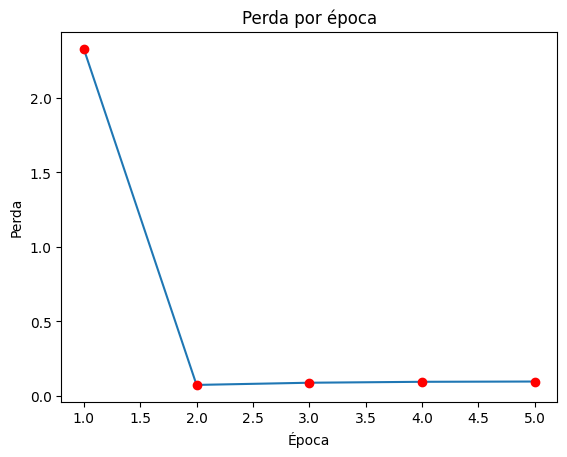

In [ ]:
model, losses, epochs, n_batches_train = train_model(batch_size=20)
plot_losses_per_batch(epochs, losses, n_batches_train)

In [ ]:
print(f'Final loss: {losses[-1]}')

Final loss: 0.013325540348887444


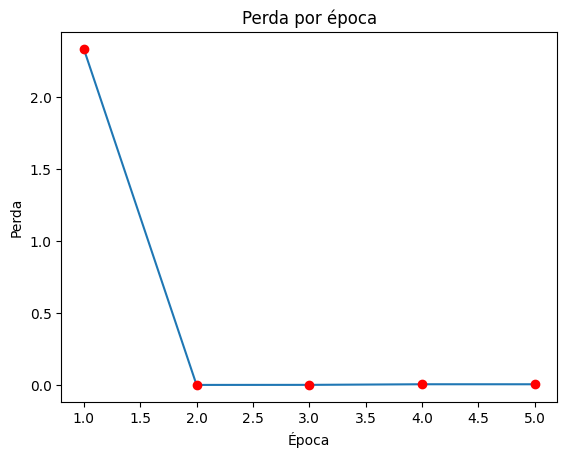

In [ ]:
model, losses, epochs, n_batches_train = train_model(batch_size=8)
plot_losses_per_batch(epochs, losses, n_batches_train)

In [ ]:
print(f'Final loss: {losses[-1]}')

Final loss: 0.0013163065304979682


## Conclusões sobre os experimentos deste notebook


A primeira observação é que para fins comparativos, usei o dataloader com o parâmetro de shuffle=False para garantir uma comparação mais justa.

Ao realizar os experimentos, ao aumentar o tamanho do batch (em comparação com o baseline batch_size=100), a loss teve uma queda mais brusca ao final da primeira época, além de no final das iterações ter sido obtido um valor de loss menor que o baseline.

Ao fazer o experimento com um batch menor que 100, os resultados de loss ao final do experimento foram bem pequenos, muito próximos a zero.

Como foram usados o mesmo pequeno número de épocas (5) para todos os experimentos, um número de batch menor se mostrou, inicialmente, uma alternativa melhor.